
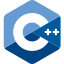
<br>

<div style="text-align:center; font-size:200%;">
 <b>GoF Adapter Pattern</b>
</div>
<br/>
<div style="text-align:center; font-size:120%;">Dr. Matthias Hölzl</div>
<br/>
<div style="text-align:center;">Coding-Akademie München</div>
<br/>
<!-- 11 GoF Adapter Pattern.ipynb -->
<!-- slides/module_450_design_patterns/topic_220_adapter.cpp -->


## Zweck

- Anpassung der Schnittstelle einer Klasse an ein erwartetes Interface
- Zusammenarbeit von Klassen, die aufgrund inkompatibler Schnittstellen nicht
  zusammenarbeiten können


## Auch bekannt als

- Wrapper


## Motivation

- Nutzung einer Bibliotheks-Klasse aufgrund inkompatibler Schnittstellen nicht
  möglich
- Beispiel: Grafischer Editor
  - Grafik-Objekte sind relativ einfach zu realisieren
  - Text ist komplexer, möglicherweise ist der Einsatz einer externen Bibliothek
    sinnvoll
- Die Schnittstelle dieser Bibliothek ist nicht kompatibel mit der Schnittstelle,
  die unser Editor erwartet
- Mit einem Adapter können wir die Schnittstelle der Bibliothek an die
  Schnittstelle unseres Editors anpassen


<img src="img/adapter_example.svg"
     style="display:block;margin:auto;width:80%"/>


## Anwendbarkeit

- Nutzung einer bestehenden Klasse mit inkompatibler Schnittstelle
- [...]


## Struktur

- Es werden zwei Varianten definiert: Klassenadapter und Objektadapter
- Klassenadapter verwenden Mehrfachvererbung und werden seltener eingesetzt
- Klassendiagramm für Objektadapter:

<img src="img/pat_adapter.svg"
     style="display: block; margin: auto; width: 80%;"/>


## Teilnehmer

- `Client`
  - Nutzt das Interface von `Target`
- `Target`
  - Definiert das Interface, das vom `Client` verwendet wird
- `Adapter`
  - Implementiert das Interface von `Target` und hält eine Referenz auf das `Adaptee`
- `Adaptee`
  - Die Klasse, deren Schnittstelle angepasst werden soll


## Interaktionen

- Der Client ruft eine Target-Methode auf einem Adapter-Objekt auf
- Der Adapter ruft die entsprechende Methode auf dem Adaptee auf


## Konsequenzen

- Klassenadapter
  - ...
- Objektadapter
  - ein Adapter kann mit mehreren adaptierten Objekten zusammenarbeiten
  - erschwert das Überschreiben von Adaptee-Methoden


## Beispielcode

- Verwaltung von Mitarbeitern in einer Firma
- Ein Teil der Daten wird von einem Legacy-System bereitgestellt
- Die Schnittstelle des Legacy-Systems ist nicht kompatibel mit der Schnittstelle
  der neuen Software
- Wir erstellen einen Adapter, der die Schnittstelle des Legacy-Systems an die
  Schnittstelle der neuen Software anpasst

In [ ]:
#include <iostream>
#include <memory>
#include <string>
#include <vector>

In [ ]:
class Employee {
public:
    Employee() = default;
    virtual ~Employee() = default;

    virtual std::string GetName() const = 0;
    virtual float GetSalary() const = 0;
};

In [ ]:
class NewEmployee : public Employee {
public:
    NewEmployee(std::string name, float salary)
        : name_{std::move(name)}, salary_{salary} {}

    std::string GetName() const override { return name_; }
    float GetSalary() const override { return salary_; }

private:
    std::string name_;
    float salary_;
};

In [ ]:
class LegacyEmployee {
public:
    std::string first_name;
    std::string last_name;
    float pay;

    LegacyEmployee(std::string first_name, std::string last_name, float pay)
        : first_name(first_name), last_name(last_name), pay(pay) {}
};

In [ ]:
class Company {
public:
    Company(
        std::vector<std::unique_ptr<Employee>> employees, float monthlyRent = 1000.0f)
        : employees_(std::move(employees)), monthlyRent_(monthlyRent) {}

    float MonthlyExpenses() const {
        float totalSalary{};
        for (const auto& employee : employees_) {
            totalSalary += employee->GetSalary();
        }
        return totalSalary + monthlyRent_;
    }

    std::string Employees() const {
        std::string list;
        for (const auto& employee : employees_) {
            list += employee->GetName() + "\n";
        }
        return list;
    }

private:
    std::vector<std::unique_ptr<Employee>> employees_;
    float monthlyRent_;
};

In [ ]:
class LegacyEmployeeAdapter : public Employee {
public:
    LegacyEmployeeAdapter(const LegacyEmployee& legacyEmployee)
        : legacyEmployee_(legacyEmployee) {}

    std::string GetName() const override {
        return legacyEmployee_.first_name + " " + legacyEmployee_.last_name;
    }

    float GetSalary() const override { return legacyEmployee_.pay; }

private:
    LegacyEmployee legacyEmployee_;
};

In [ ]:
std::unique_ptr<Employee> legacyEmployee1{
    std::make_unique<LegacyEmployeeAdapter>(LegacyEmployee{"John", "Doe", 1500.0f})};
std::unique_ptr<Employee> legacyEmployee2{
    std::make_unique<LegacyEmployeeAdapter>(LegacyEmployee{"Jane", "Miller", 2000.0f})};
std::unique_ptr<Employee> newEmployee1{
    std::make_unique<NewEmployee>("Max Mustermann", 2500.0f)};
std::unique_ptr<Employee> newEmployee2{
    std::make_unique<NewEmployee>("Erica Jones", 3000.0f)};

In [ ]:
std::vector<std::unique_ptr<Employee>> employees;
employees.push_back(std::move(legacyEmployee1));
employees.push_back(std::move(legacyEmployee2));
employees.push_back(std::move(newEmployee1));
employees.push_back(std::move(newEmployee2));

In [ ]:
Company company{std::move(employees)};

In [ ]:
std::cout << "Monthly expenses:" << company.MonthlyExpenses();

In [ ]:
std::cout << "Employees:\n" << company.Employees();


## Praxisbeispiele

- ET++ Draw
- InterViews 2.6
- ...


## Verwandte Muster

- Bridge: ähnliche Struktur, aber andere Absicht (Trennung von Schnittstelle und
  Implementierung)
- Decorator: erweitert anderes Objekt, ohne die Schnittstelle zu ändern
- Proxy: Stellvertreter für ein Objekt, das die gleiche Schnittstelle hat


## Workshop: Einheitliche Schnittstelle für einen Chat-Client

In diesem Workshop sollen verschiedene Messaging-Dienste, wie SMS, E-Mail und
eine In-App-Chat-System, zu einer Chat Applikation hinzugefügt werden. Die
Herausforderung besteht darin, dass jeder dieser Dienste seine eigene Art
hat, Nachrichten zu senden und zu empfangen.

Im Folgenden finden Sie den Startercode mit einer Klasse für Benutzer des
Dienstes und separaten Klassen für jeden Messaging-Dienst.

In [ ]:
#include <iostream>
#include <string>
#include <vector>

In [ ]:
class User {
public:
    std::string userName;
    std::string phoneNumber;
    std::string emailAddress;

    User(std::string userName, std::string phoneNumber, std::string emailAddress)
        : userName{userName}, phoneNumber{phoneNumber}, emailAddress{emailAddress} {}
}

In [ ]:
class SMS {
public:
    void SendText(std::string number, std::string message) {
        std::cout << "Sending SMS to " << number << ": " << message << "\n";
    }

    void ReceiveText(std::string number) {
        std::cout << "Receiving a SMS from " << number << "\n";
    }
};

In [ ]:
class Email {
public:
    void SendEmail(std::string emailAddress, std::string subject, std::string message) {
        std::cout << "Sending email to " << emailAddress << " with subject '" << subject
                  << "': " << message << "\n";
    }

    void ReceiveEmail(std::string emailAddress) {
        std::cout << "Receiving an email from " << emailAddress << "\n";
    }
};

In [ ]:
class InAppChat {
public:
    void SendMessage(const User& user, std::string message) {
        std::cout << "Sending message to " << user.userName << ": " << message << "\n";
    }

    void ReceiveMessage(const User& user) {
        std::cout << "Receiving a message from " << user.userName << "\n";
    }
};

In [ ]:
class MessagingService {
public:
    MessagingService() = default;
    MessagingService(const MessagingService&) = delete;
    MessagingService& operator=(const MessagingService&) = delete;
    MessagingService(MessagingService&&) = delete;
    MessagingService& operator=(MessagingService&&) = delete;
    virtual ~MessagingService() = default;

    virtual void Send(const User& to, std::string message) = 0;
    virtual void Receive(const User& from) = 0;
};

In [ ]:
class ChatApplication {
private:
    std::vector<std::unique_ptr<MessagingService>> adapters;

public:
    ChatApplication(std::vector<std::unique_ptr<MessagingService>> adapters)
        : adapters{std::move(adapters)} {}

    void SendMessage(const User& to, std::string message) {
        for (auto& adapter : adapters) {
            adapter->Send(to, message);
        }
    }

    void ReceiveMessage(const User& from) {
        for (auto& adapter : adapters) {
            adapter->Receive(from);
        }
    }
};


Die folgenden Variablen definieren die Messaging-Dienste, die von der Chat-Anwendung
verwendet werden sollen. Sie müssen nicht geändert werden.

In [ ]:
SMS sms;
Email email;
InAppChat chat;


- Definieren Sie Adapter für die drei Messaging-Dienste


- Erstellen Sie hier Adapter für die Messaging-Dienste:

In [ ]:
// std::unique_ptr<MessagingService> smsAdapter{???};
// std::unique_ptr<MessagingService> emailAdapter{???};
// std::unique_ptr<MessagingService> chatAdapter{???};

In [ ]:
std::vector<std::unique_ptr<MessagingService>> messagingServices = {};


- Fügen Sie die Adapter zum Vektor `messagingServices` hinzu
- (Sie müssen die Adapter wahrscheinlich mit `std::move()` verschieben)


- Überprüfen Sie, dass Ihre Adapter funktionieren, indem Sie die folgenden
  Zeilen ausführen
- Sie sollten eine Ausgabe für jeden Messaging-Dienst sehen, in der die
  entsprechende Nachricht angezeigt wird

In [ ]:
ChatApplication chatApp{std::move(messagingServices)};

In [ ]:
chatApp.SendMessage({"Joe Example", "555-1234", "joe@example.org"}, "Hello!");

In [ ]:
chatApp.ReceiveMessage({"Joe Example", "555-1234", "joe@example.org"});